# Student grades prediction

# Project Description

The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades

Columns Description-  total 43 columns

-Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 
Predict - CGPA of a student based on different grades in four years.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df=pd.read_csv('Grades.csv')
df

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
0    CS-97001     B-     D+     C-         C     C-     D+      D     C-   
1    CS-97002      A      D     D+         D     B-      C      D      A   
2    CS-97003      A      B      A        B-     B+      A     B-     B+   
3    CS-97004      D     C+     D+         D      D     A-     D+     C-   
4    CS-97005     A-     A-     A-        B+      A      A     A-     B+   
..        ...    ...    ...    ...       ...    ...    ...    ...    ...   
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
0       B-  ...     C-     C-     C-     C-     A-      A     C-      B   
1       D+  ...     D+      D      C      D     A-     B-      C      C   
2       A-  ...      B      B      A      C      A      A      A     A-   
3        D  ...     D+      C     D+     C-     B-      B     C+     C+   
4        A  ...     B-     B+     B+     B-     A-      A     A-     A-   
..     ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
566     A+  ...     A-     A-      A      A      A     B+     B+      B   
567      A  ...     B+     B+      A      A     A-      B     A-      C   
568      A  ...     A-      B      A     B+      A      C     B+     A-   
569     B-  ...      D      B      B     C-      D      C      B     B-   
570      C  ...     C+      C     B-      D      F     C-     B+      D   

    CS-412   CGPA  
0       A-  2.205  
1        B  2.008  
2        A  3.608  
3       C+  1.906  
4        A  3.448  
..     ...    ...  
566      A  3.798  
567     A-  3.772  
568     A-  3.470  
569      C  2.193  
570     C-  1.753  

[571 rows x 43 columns]

In [3]:
df.head(10)

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
0  CS-97001     B-     D+     C-         C     C-     D+      D     C-     B-   
1  CS-97002      A      D     D+         D     B-      C      D      A     D+   
2  CS-97003      A      B      A        B-     B+      A     B-     B+     A-   
3  CS-97004      D     C+     D+         D      D     A-     D+     C-      D   
4  CS-97005     A-     A-     A-        B+      A      A     A-     B+      A   
5  CS-97006      A     B-      B        D+     C+     A-     C+      B     B+   
6  CS-97007     B-     C-     A-         D     A-      B      A     B+     A-   
7  CS-97008     B+     B+     C+         C      C     A-     C-     A-      B   
8  CS-97009     A-      C     A-        D+      B     A-     A-     A-     B+   
9  CS-97010      A      B     C+         B      B     A-      C     B-     A-   

   ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0  ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1  ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2  ...      B      B      A      C      A      A      A     A-      A  3.608  
3  ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4  ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  
5  ...      C     B-     C+     C+     A-     A-     B+     B-      B  3.026  
6  ...     B-      C     B+     B-      A     A-     B+     B+      A  2.957  
7  ...     D+     B+     B+      C      A     B+     A-     A-     A-  3.043  
8  ...     B+      B     B-     C+      A     A-     B+     A-      A  3.358  
9  ...     C+     B-     B+     B-      A      A     A-      B      A  3.247  

[10 rows x 43 columns]

Here we can see top 10 rows of the dataset

In [4]:
df.tail(10)

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
561  CS-97562     B-      B     A-        B+     B-     B+     A-      A   
562  CS-97563      B      B      A         C      B     B+      B     C-   
563  CS-97564     A-      B      A        D+     B+     A-      C      A   
564  CS-97565     A-      D      A         C     B+     B+      C     A-   
565  CS-97566      F      F      D        C-    NaN     D+      D    NaN   
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
561      B  ...     B+     B-     B+     D+     C+     B-     B+      C   
562     B+  ...     A-      B     B+     B+     B+     C+     A-     D+   
563     C+  ...     B+      C     B+     C-     C-      C      F      D   
564     B-  ...      B     C+     B+     D+      C     C-      B      C   
565    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
566     A+  ...     A-     A-      A      A      A     B+     B+      B   
567      A  ...     B+     B+      A      A     A-      B     A-      C   
568      A  ...     A-      B      A     B+      A      C     B+     A-   
569     B-  ...      D      B      B     C-      D      C      B     B-   
570      C  ...     C+      C     B-      D      F     C-     B+      D   

    CS-412   CGPA  
561     C+  2.828  
562     C+  2.821  
563      C  2.612  
564     B-  2.607  
565    NaN  0.800  
566      A  3.798  
567     A-  3.772  
568     A-  3.470  
569      C  2.193  
570     C-  1.753  

[10 rows x 43 columns]

Here we can see last 10 rows of the dataset

In [5]:
df.shape

(571, 43)

# Removing unnessary data from the dataset

In [6]:
df.drop('Seat No.', inplace=True, axis=1)

In [7]:
df

PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119 ME-107  \
0       B-     D+     C-         C     C-     D+      D     C-     B-     C-   
1        A      D     D+         D     B-      C      D      A     D+      D   
2        A      B      A        B-     B+      A     B-     B+     A-     A-   
3        D     C+     D+         D      D     A-     D+     C-      D     C+   
4       A-     A-     A-        B+      A      A     A-     B+      A     A-   
..     ...    ...    ...       ...    ...    ...    ...    ...    ...    ...   
566      B      A      A        A-     A+      A     A-     A-     A+     B+   
567     A+      A      A         A      A      A      A     A-      A      A   
568      B      A     A-        B+      A      A      A      A      A      B   
569      A     B+      D         A      D     D+     B-     C-     B-     C-   
570      C      D      D         C      C     D+      B     C+      C     D+   

     ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0    ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1    ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2    ...      B      B      A      C      A      A      A     A-      A  3.608  
3    ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4    ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  
..   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
566  ...     A-     A-      A      A      A     B+     B+      B      A  3.798  
567  ...     B+     B+      A      A     A-      B     A-      C     A-  3.772  
568  ...     A-      B      A     B+      A      C     B+     A-     A-  3.470  
569  ...      D      B      B     C-      D      C      B     B-      C  2.193  
570  ...     C+      C     B-      D      F     C-     B+      D     C-  1.753  

[571 rows x 42 columns]

In [8]:
df.shape

(571, 42)

# Exploratory Data Analysis

In [9]:
df.columns.to_list()

['PH-121',
 'HS-101',
 'CY-105',
 'HS-105/12',
 'MT-111',
 'CS-105',
 'CS-106',
 'EL-102',
 'EE-119',
 'ME-107',
 'CS-107',
 'HS-205/20',
 'MT-222',
 'EE-222',
 'MT-224',
 'CS-210',
 'CS-211',
 'CS-203',
 'CS-214',
 'EE-217',
 'CS-212',
 'CS-215',
 'MT-331',
 'EF-303',
 'HS-304',
 'CS-301',
 'CS-302',
 'TC-383',
 'MT-442',
 'EL-332',
 'CS-318',
 'CS-306',
 'CS-312',
 'CS-317',
 'CS-403',
 'CS-421',
 'CS-406',
 'CS-414',
 'CS-419',
 'CS-423',
 'CS-412',
 'CGPA']

it is showing the list of all the columns present in the dataset

In [10]:
#checking for the data types present in the columns
df.dtypes

PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

As we can see here that there are two types of data type present in the data set ['object', 'float64']

In [11]:
#for the general informaton of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    object 
 1   HS-101     571 non-null    object 
 2   CY-105     570 non-null    object 
 3   HS-105/12  570 non-null    object 
 4   MT-111     569 non-null    object 
 5   CS-105     571 non-null    object 
 6   CS-106     569 non-null    object 
 7   EL-102     569 non-null    object 
 8   EE-119     569 non-null    object 
 9   ME-107     569 non-null    object 
 10  CS-107     569 non-null    object 
 11  HS-205/20  566 non-null    object 
 12  MT-222     566 non-null    object 
 13  EE-222     564 non-null    object 
 14  MT-224     564 non-null    object 
 15  CS-210     564 non-null    object 
 16  CS-211     566 non-null    object 
 17  CS-203     566 non-null    object 
 18  CS-214     565 non-null    object 
 19  EE-217     565 non-null    object 
 20  CS-212    

Here we can see the basic information about the dataset like types of dataset present in the column number of rows null values and memory occupied by the dataset. and here the prescence of null values are different for each column that means null values are present in the dataset

In [12]:
df.isnull().sum()

PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

we can see that there are null values present in the data set

In [13]:
df.isnull().sum().sum()

425

There are total 425 values missing from the dataset

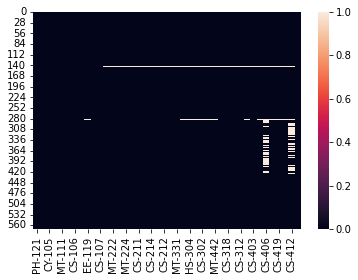

In [15]:
#Checking for null values by visualizing heatmap
sns.heatmap(df.isnull())
plt.show()

The blank space present in the heatmap showing the presence of the null value in the dataset

# Treating null values

In [16]:
null_col=[
'CY-105',        
'HS-105/12',     
'MT-111',               
'CS-106',        
'EL-102',        
'EE-119',        
'ME-107',        
'CS-107',        
'HS-205/20',    
'MT-222',       
'EE-222',        
'MT-224',        
'CS-210',        
'CS-211',        
'CS-203',        
'CS-214',       
'EE-217',        
'CS-212',       
'CS-215',       
'MT-331',       
'EF-303',       
'HS-304',       
'CS-301',       
'CS-302',       
'TC-383',       
'MT-442',       
'EL-332',        
'CS-318',        
'CS-306',       
'CS-312',       
'CS-317',       
'CS-403',       
'CS-421',     
'CS-406',       
'CS-414',       
'CS-419' ,     
'CS-423',       
'CS-412']

In [17]:
for i in null_col:
    print(df[i].mode())
    print(df[i].mode()[0])
    df[i].fillna(df[i].mode()[0], inplace=True)
         

0    A
Name: CY-105, dtype: object
A
0    A
Name: HS-105/12, dtype: object
A
0    A-
Name: MT-111, dtype: object
A-
0    A-
Name: CS-106, dtype: object
A-
0    A-
Name: EL-102, dtype: object
A-
0    A-
Name: EE-119, dtype: object
A-
0    A-
Name: ME-107, dtype: object
A-
0    A
Name: CS-107, dtype: object
A
0    A-
Name: HS-205/20, dtype: object
A-
0    A-
Name: MT-222, dtype: object
A-
0    A
Name: EE-222, dtype: object
A
0    A-
Name: MT-224, dtype: object
A-
0    A-
Name: CS-210, dtype: object
A-
0    A-
Name: CS-211, dtype: object
A-
0    A-
Name: CS-203, dtype: object
A-
0    C
Name: CS-214, dtype: object
C
0    A-
Name: EE-217, dtype: object
A-
0    A-
Name: CS-212, dtype: object
A-
0    A-
Name: CS-215, dtype: object
A-
0    A
Name: MT-331, dtype: object
A
0    B
Name: EF-303, dtype: object
B
0    A-
Name: HS-304, dtype: object
A-
0    A-
Name: CS-301, dtype: object
A-
0    A-
Name: CS-302, dtype: object
A-
0    A
Name: TC-383, dtype: object
A
0    A-
Name: MT-442, dtype: object

In [18]:
#Again checking for the null values
df.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

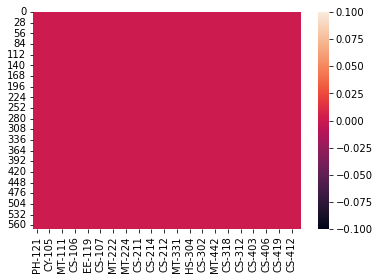

In [19]:
#Checking for null values by visualizing heatmap
sns.heatmap(df.isnull())
plt.show()

Here we can se that now there is no null value present in the dataset. 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    object 
 1   HS-101     571 non-null    object 
 2   CY-105     571 non-null    object 
 3   HS-105/12  571 non-null    object 
 4   MT-111     571 non-null    object 
 5   CS-105     571 non-null    object 
 6   CS-106     571 non-null    object 
 7   EL-102     571 non-null    object 
 8   EE-119     571 non-null    object 
 9   ME-107     571 non-null    object 
 10  CS-107     571 non-null    object 
 11  HS-205/20  571 non-null    object 
 12  MT-222     571 non-null    object 
 13  EE-222     571 non-null    object 
 14  MT-224     571 non-null    object 
 15  CS-210     571 non-null    object 
 16  CS-211     571 non-null    object 
 17  CS-203     571 non-null    object 
 18  CS-214     571 non-null    object 
 19  EE-217     571 non-null    object 
 20  CS-212    

As we can see here Non-Null Count for each column is same it means that there is no null value present in the dataset.  

In [21]:
#checking for the number of unique values present in the dataset
df['CGPA'].nunique()

491

 We can see that out of 571 values 491 are unique values. so we can say that it is a regression problem

# Data Visualization

# Univariate Analysis

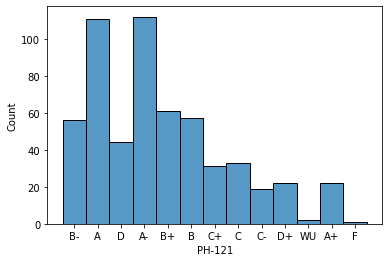

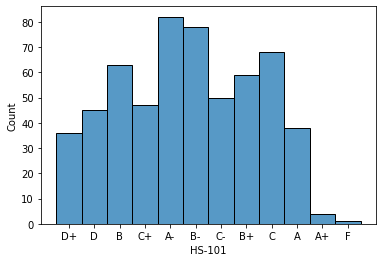

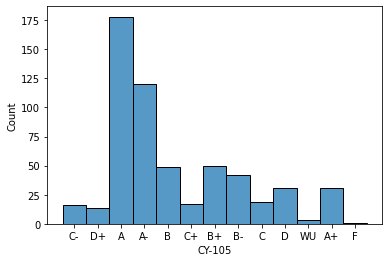

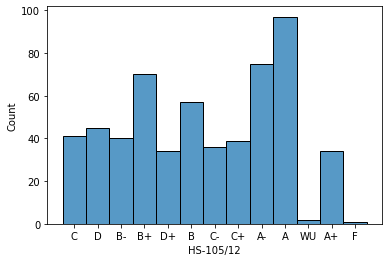

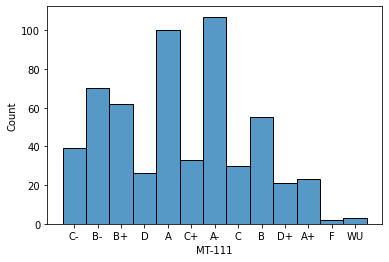

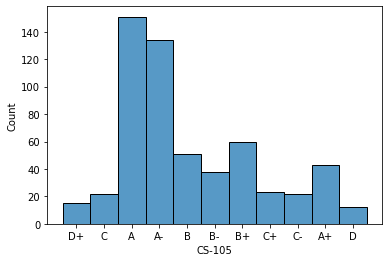

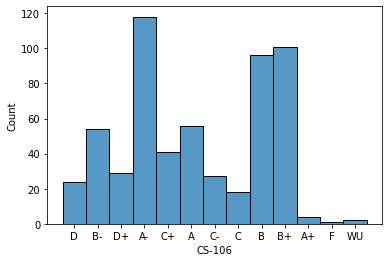

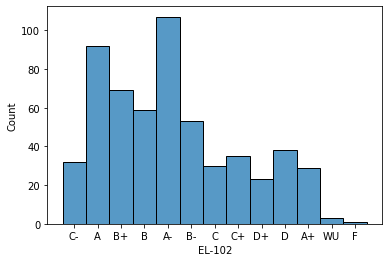

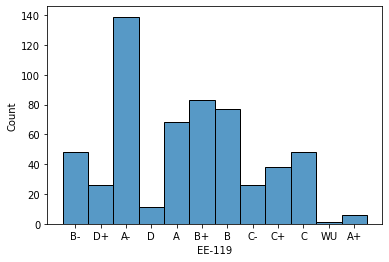

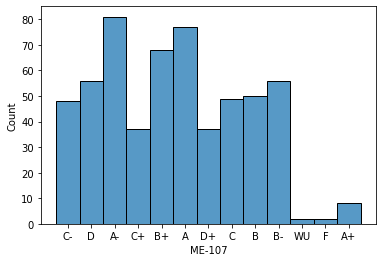

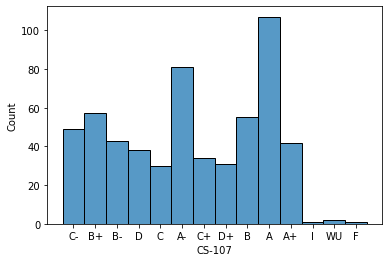

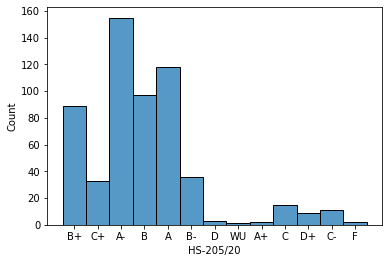

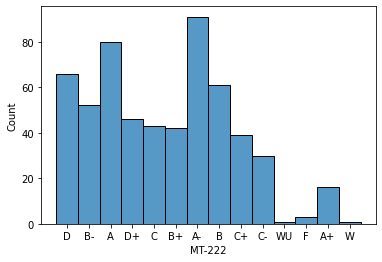

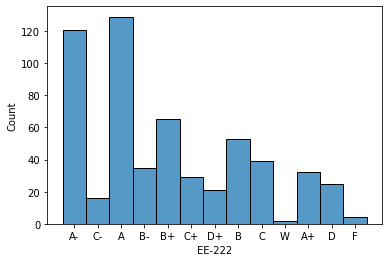

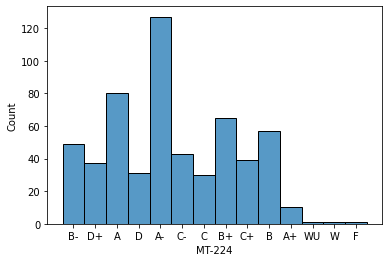

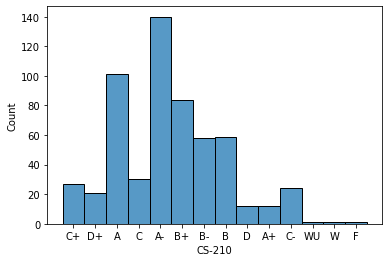

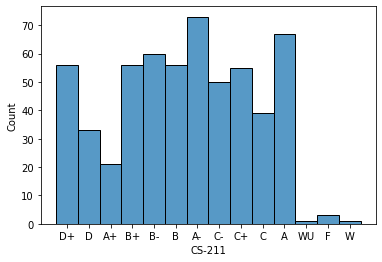

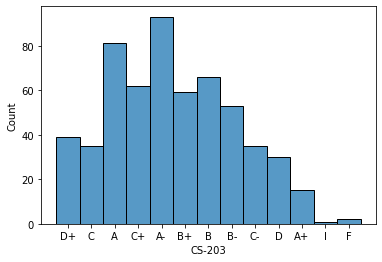

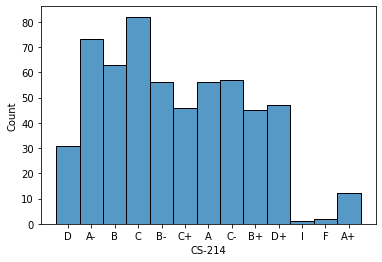

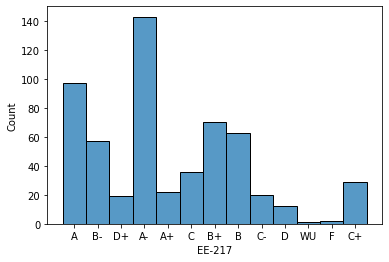

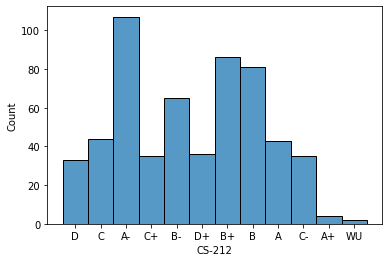

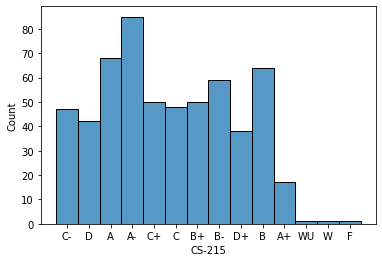

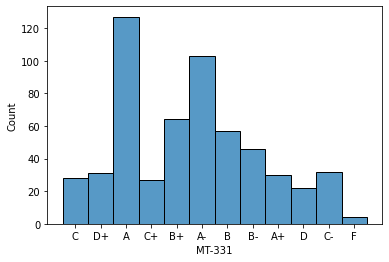

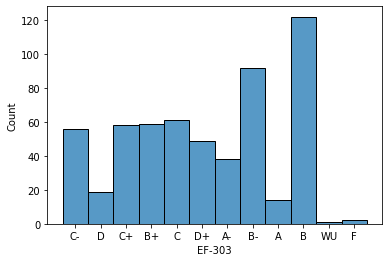

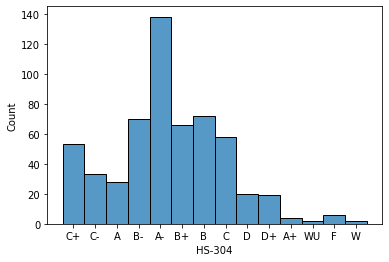

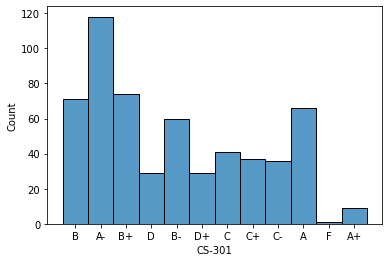

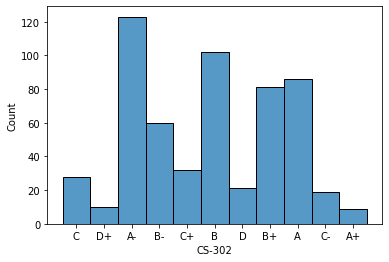

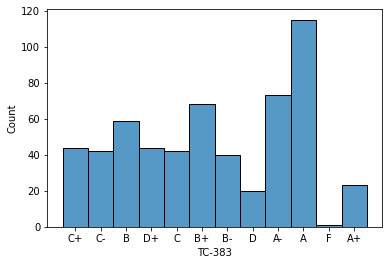

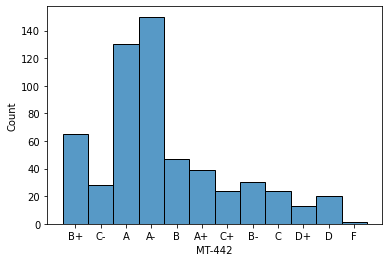

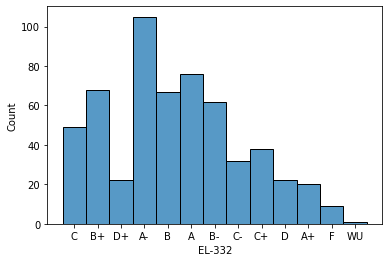

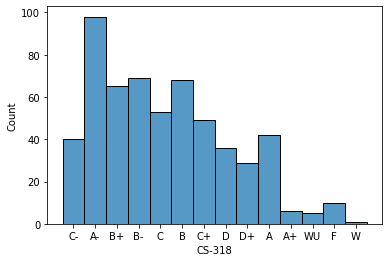

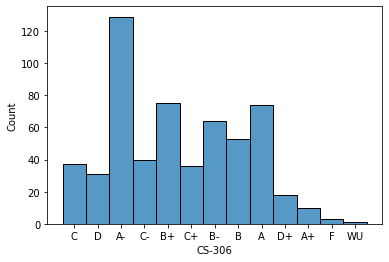

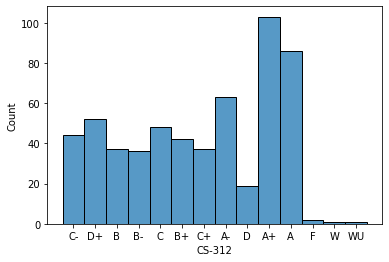

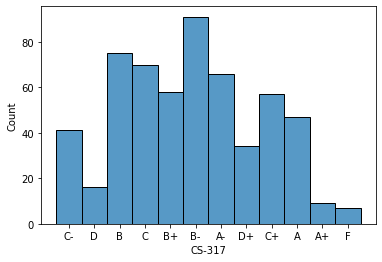

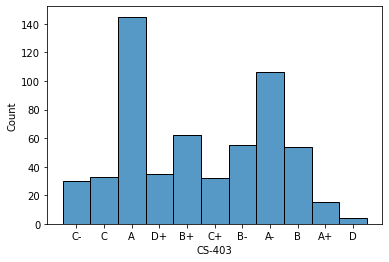

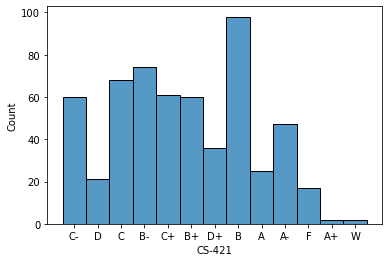

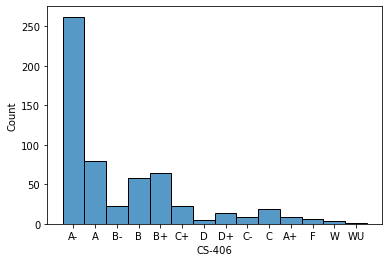

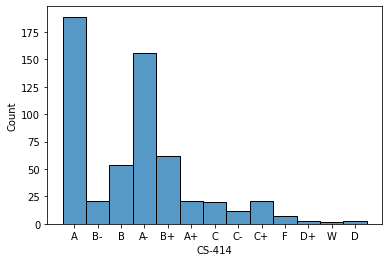

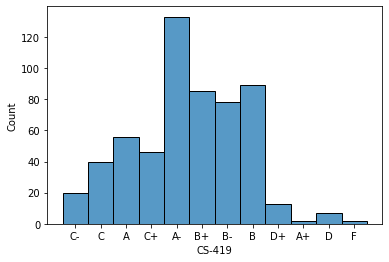

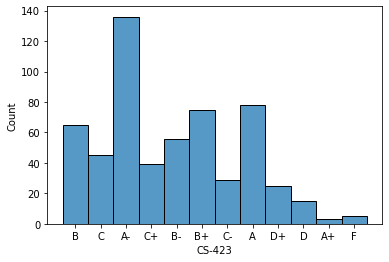

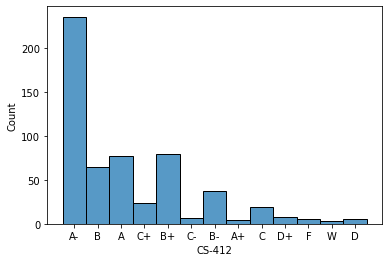

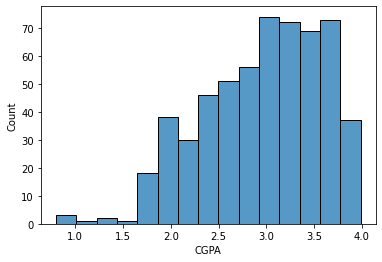

In [44]:
for i in df.columns:
    sns.histplot(df[i])
    plt.show()

# Baivarient Analysis

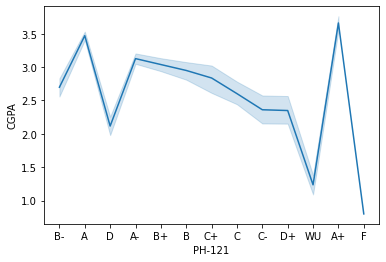

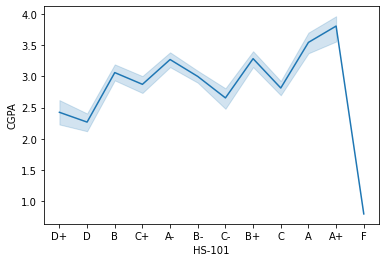

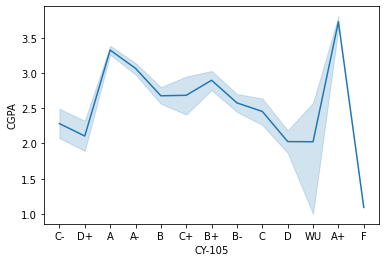

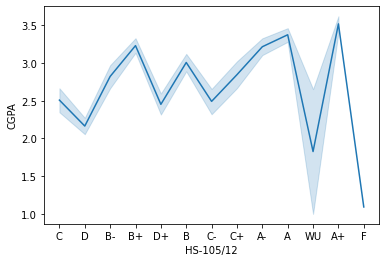

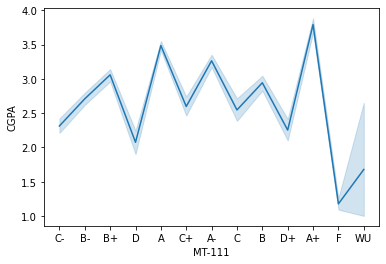

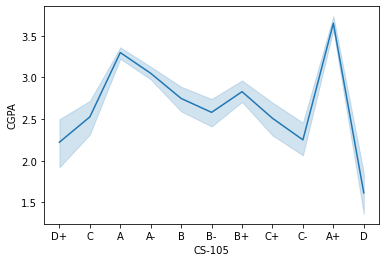

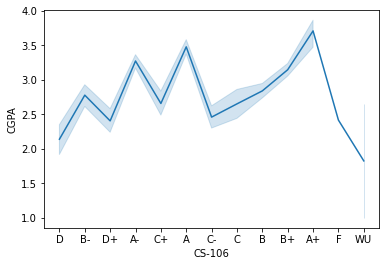

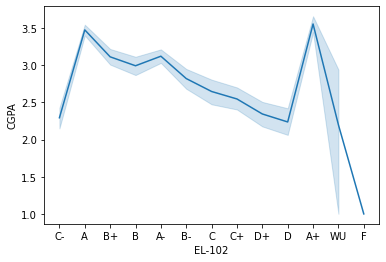

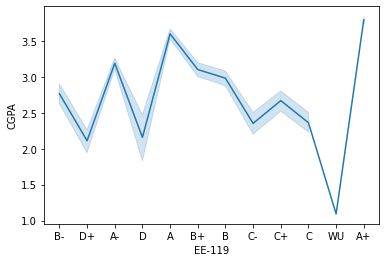

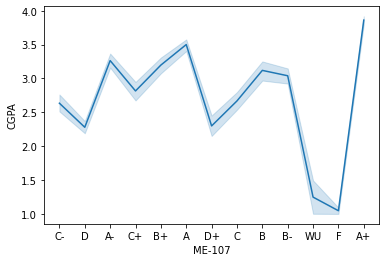

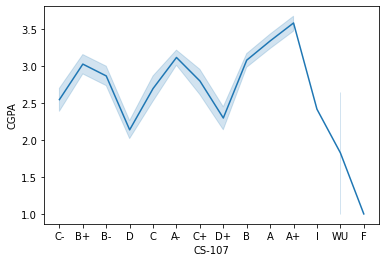

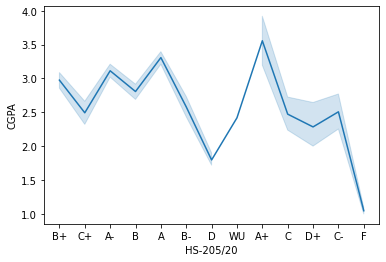

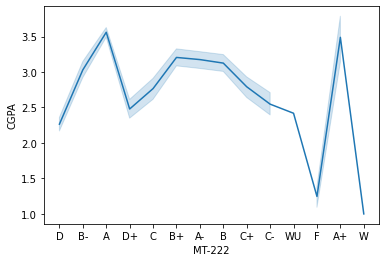

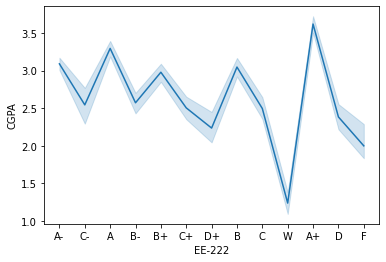

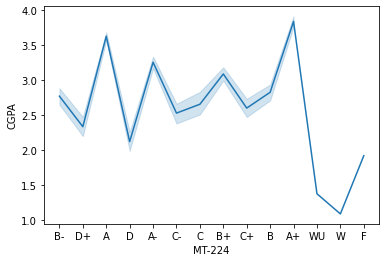

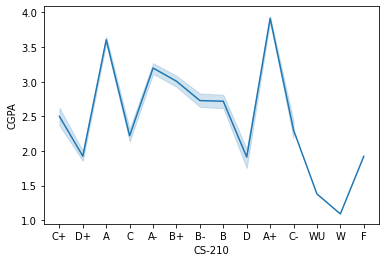

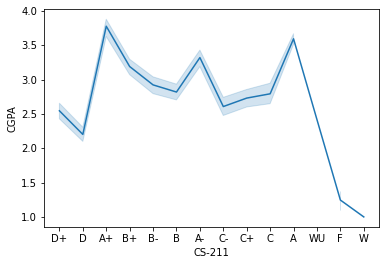

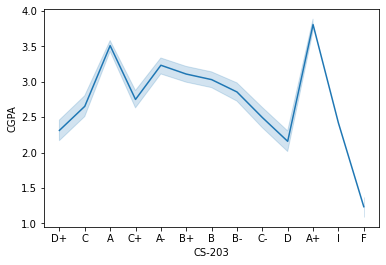

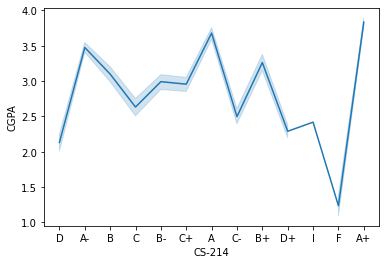

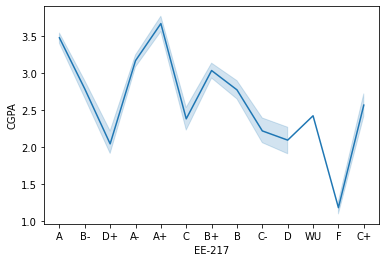

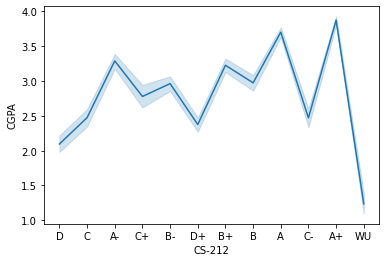

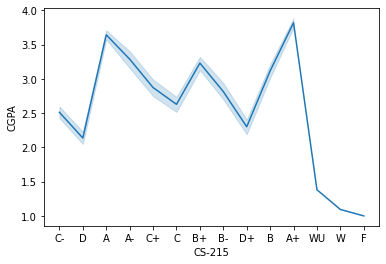

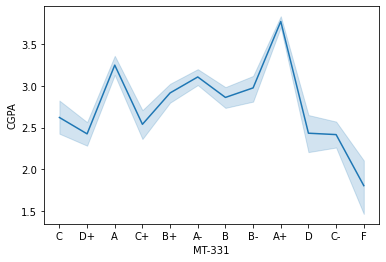

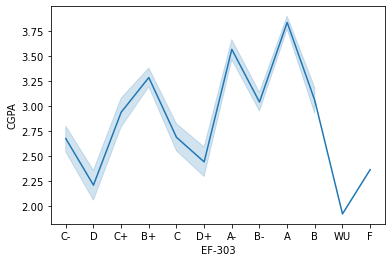

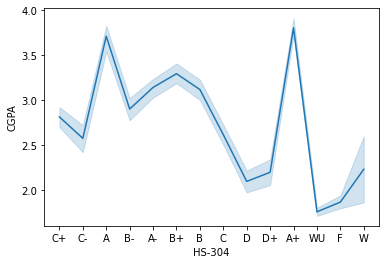

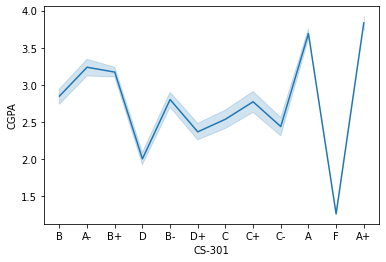

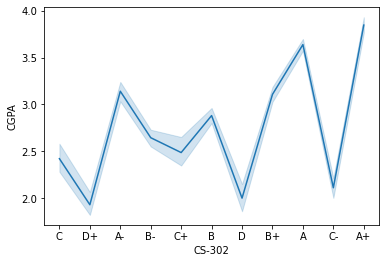

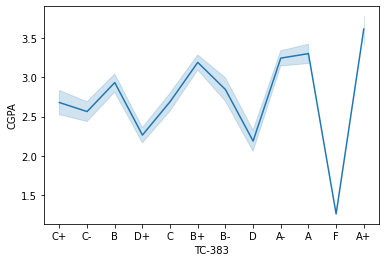

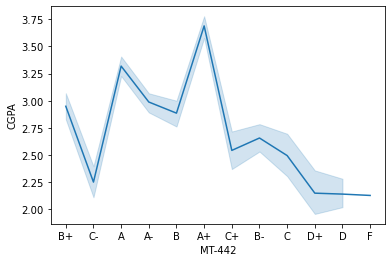

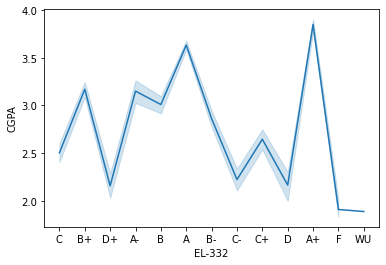

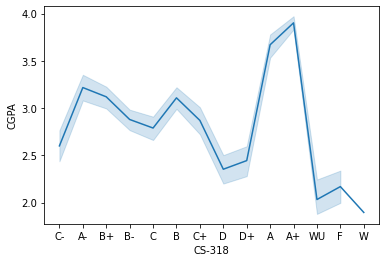

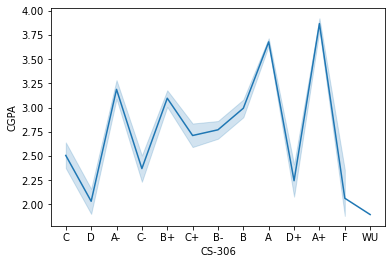

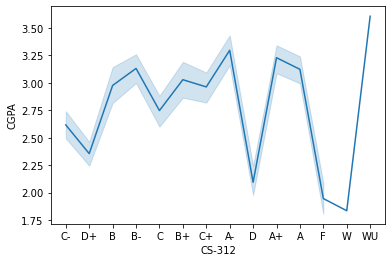

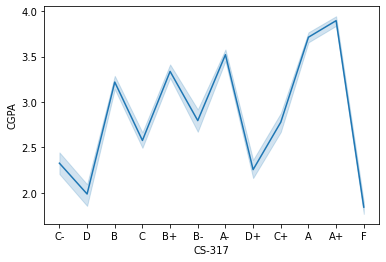

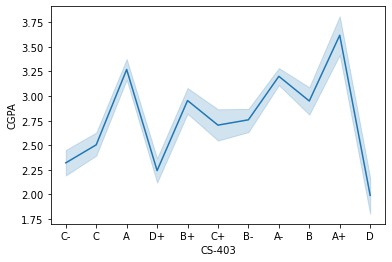

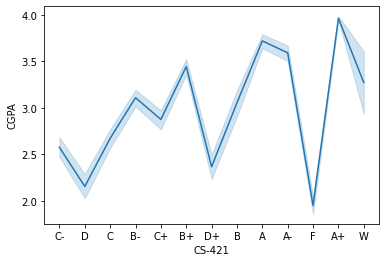

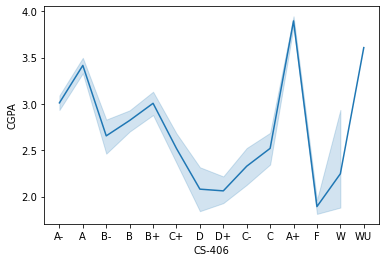

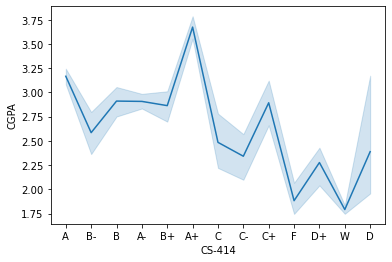

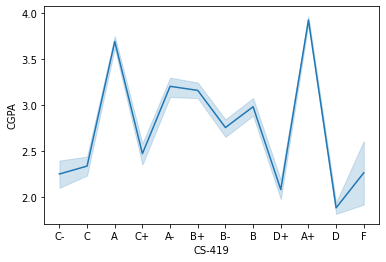

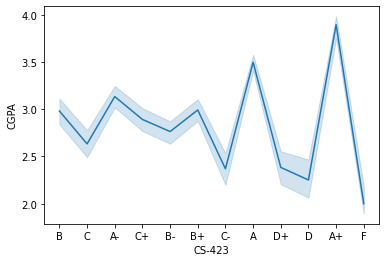

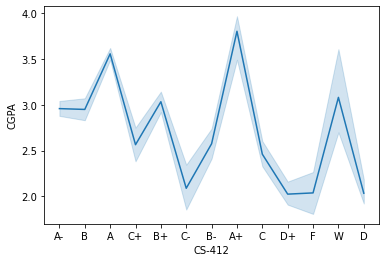

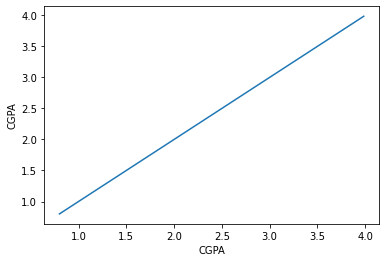

In [47]:
for i in df.columns:
    sns.lineplot(x=i, y='CGPA', data=df, palette='bright')
    plt.show()

In [48]:
#Encoding categorical columns using label Encoder

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=LE.fit_transform(df[i].values.reshape(-1,1))
        
df

PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  \
0         5      10       8          6       8      10       9       8   
1         0       9      10          9       5       6       9       0   
2         0       3       0          5       4       0       5       4   
3         9       7      10          9       9       2      10       8   
4         2       2       2          4       0       0       2       4   
..      ...     ...     ...        ...     ...     ...     ...     ...   
566       3       0       0          2       1       0       2       2   
567       1       0       0          0       0       0       0       2   
568       3       0       2          4       0       0       0       0   
569       0       4       9          0       9      10       5       8   
570       6       9       9          6       6      10       3       7   

     EE-119  ME-107  ...  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  \
0         5       8  ...       8       8       8       8       2       0   
1        10       9  ...      10       9       6       9       2       5   
2         2       2  ...       3       3       0       6       0       0   
3         9       7  ...      10       6      10       8       5       3   
4         0       2  ...       5       4       4       5       2       0   
..      ...     ...  ...     ...     ...     ...     ...     ...     ...   
566       1       4  ...       2       2       0       0       0       4   
567       0       0  ...       4       4       0       0       2       3   
568       0       3  ...       2       3       0       4       0       6   
569       5       8  ...       9       3       3       8       9       6   
570       6      10  ...       7       6       5       9      11       8   

     CS-419  CS-423  CS-412   CGPA  
0         8       3       2  2.205  
1         6       6       3  2.008  
2         0       2       0  3.608  
3         7       7       7  1.906  
4         2       2       0  3.448  
..      ...     ...     ...    ...  
566       4       3       0  3.798  
567       2       6       2  3.772  
568       4       2       2  3.470  
569       3       5       6  2.193  
570       4       9       8  1.753  

[571 rows x 42 columns]

# Multivarient Analysis

In [52]:
plot=plt.figure(figsize=(15,20))
sns.pairplot(df)
plt.show()

<Figure size 1080x1440 with 0 Axes>

In [53]:
#statistical summary  
df.describe()

PH-121      HS-101      CY-105   HS-105/12      MT-111      CS-105  \
count  571.000000  571.000000  571.000000  571.000000  571.000000  571.000000   
mean     3.781086    5.071804    2.898424    4.241681    3.896673    2.838879   
std      3.046895    2.785317    2.964737    3.200507    2.988546    2.696709   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000    3.000000    0.000000    2.000000    2.000000    0.000000   
50%      3.000000    5.000000    2.000000    4.000000    4.000000    2.000000   
75%      6.000000    7.000000    4.500000    7.000000    6.000000    4.000000   
max     12.000000   11.000000   12.000000   12.000000   12.000000   10.000000   

           CS-106      EL-102      EE-119      ME-107  ...      CS-312  \
count  571.000000  571.000000  571.000000  571.000000  ...  571.000000   
mean     4.122592    3.959720    3.886165    4.779335  ...    4.071804   
std      2.727192    3.031436    2.657528    3.146202  ...    3.362345   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      2.000000    2.000000    2.000000    2.000000  ...    1.000000   
50%      4.000000    3.000000    3.000000    5.000000  ...    3.000000   
75%      5.000000    6.000000    6.000000    8.000000  ...    7.000000   
max     12.000000   12.000000   11.000000   12.000000  ...   13.000000   

           CS-317      CS-403      CS-421      CS-406      CS-414      CS-419  \
count  571.000000  571.000000  571.000000  571.000000  571.000000  571.000000   
mean     4.835377    3.432574    5.385289    2.984238    2.397548    3.856392   
std      2.740382    2.980685    2.729063    2.468346    2.499388    2.382769   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      3.000000    0.000000    3.000000    2.000000    0.000000    2.000000   
50%      5.000000    3.000000    5.000000    2.000000    2.000000    4.000000   
75%      7.000000    5.000000    7.000000    4.000000    4.000000    5.000000   
max     11.000000   10.000000   12.000000   13.000000   12.000000   11.000000   

           CS-423      CS-412        CGPA  
count  571.000000  571.000000  571.000000  
mean     3.966725    3.049037    2.954888  
std      2.795475    2.332316    0.620552  
min      0.000000    0.000000    0.800000  
25%      2.000000    2.000000    2.538000  
50%      4.000000    2.000000    3.029000  
75%      6.000000    4.000000    3.451000  
max     11.000000   12.000000    3.985000  

[8 rows x 42 columns]

After encoding the categorical columns we can see all columns details here. The counts of all the columns are same that means no null values in the dataset. This describe method describe the count,mean,std.,IQR and max values of all the columns.

# Correlation between target variable and independent variables

In [54]:
#checking the correlation
cor=df.corr()
cor

PH-121    HS-101    CY-105  HS-105/12    MT-111    CS-105  \
PH-121     1.000000  0.382436  0.557843   0.498561  0.468968  0.609990   
HS-101     0.382436  1.000000  0.335074   0.473132  0.432742  0.400713   
CY-105     0.557843  0.335074  1.000000   0.510123  0.538380  0.578573   
HS-105/12  0.498561  0.473132  0.510123   1.000000  0.494731  0.482406   
MT-111     0.468968  0.432742  0.538380   0.494731  1.000000  0.393684   
CS-105     0.609990  0.400713  0.578573   0.482406  0.393684  1.000000   
CS-106     0.293963  0.312019  0.378223   0.499093  0.500729  0.286324   
EL-102     0.423942  0.349412  0.447539   0.360304  0.555895  0.353949   
EE-119     0.579964  0.309697  0.467250   0.400303  0.409161  0.507357   
ME-107     0.533558  0.336545  0.464418   0.320137  0.471685  0.455470   
CS-107     0.477761  0.495906  0.481277   0.540405  0.488977  0.503239   
HS-205/20  0.296428  0.178344  0.261281   0.179766  0.328574  0.192982   
MT-222     0.551805  0.391699  0.485371   0.459571  0.499415  0.477302   
EE-222     0.529273  0.381091  0.394398   0.379369  0.393494  0.487650   
MT-224     0.348024  0.265585  0.437339   0.392068  0.567848  0.259561   
CS-210     0.513314  0.322239  0.489937   0.462070  0.571972  0.440588   
CS-211     0.329882  0.335788  0.453911   0.352640  0.556099  0.342449   
CS-203     0.462853  0.263205  0.400036   0.295711  0.512505  0.410614   
CS-214     0.421076  0.461156  0.463044   0.413251  0.587102  0.414244   
EE-217     0.423468  0.328305  0.398219   0.357855  0.514243  0.339227   
CS-212     0.351823  0.340568  0.420848   0.455820  0.565169  0.321335   
CS-215     0.486069  0.401812  0.512438   0.453450  0.577513  0.456677   
MT-331     0.183034  0.173494  0.366648   0.259306  0.431197  0.231626   
EF-303     0.196272  0.240540  0.334633   0.384338  0.410918  0.196685   
HS-304     0.420629  0.418026  0.323331   0.345015  0.315129  0.456401   
CS-301     0.300945  0.313397  0.368489   0.415815  0.538492  0.230551   
CS-302     0.448213  0.345292  0.460447   0.419373  0.507059  0.426776   
TC-383     0.189226  0.320385  0.300547   0.397499  0.493420  0.214507   
MT-442     0.443980  0.226441  0.430456   0.320701  0.404591  0.407767   
EL-332     0.419078  0.378717  0.353731   0.354519  0.567875  0.360826   
CS-318     0.441321  0.404702  0.322503   0.373775  0.370270  0.444708   
CS-306     0.472384  0.432533  0.362537   0.484828  0.474400  0.418766   
CS-312     0.038184  0.213380  0.261555   0.263143  0.467946  0.059711   
CS-317     0.464022  0.364250  0.472137   0.478816  0.555098  0.387639   
CS-403     0.321264  0.229546  0.464575   0.451907  0.410540  0.279329   
CS-421     0.290351  0.301934  0.349827   0.415946  0.511463  0.236345   
CS-406     0.280166  0.265551  0.129957   0.168150  0.300391  0.237615   
CS-414     0.152437  0.225977  0.008774   0.142806  0.228637  0.121965   
CS-419     0.462770  0.284668  0.430053   0.465352  0.502473  0.306827   
CS-423     0.094921  0.228103  0.120885   0.235029  0.400679  0.045134   
CS-412     0.293815  0.226039  0.064912   0.153293  0.269792  0.179777   
CGPA      -0.663135 -0.537170 -0.658282  -0.613989 -0.730095 -0.613169   

             CS-106    EL-102    EE-119    ME-107  ...    CS-312    CS-317  \
PH-121     0.293963  0.423942  0.579964  0.533558  ...  0.038184  0.464022   
HS-101     0.312019  0.349412  0.309697  0.336545  ...  0.213380  0.364250   
CY-105     0.378223  0.447539  0.467250  0.464418  ...  0.261555  0.472137   
HS-105/12  0.499093  0.360304  0.400303  0.320137  ...  0.263143  0.478816   
MT-111     0.500729  0.555895  0.409161  0.471685  ...  0.467946  0.555098   
CS-105     0.286324  0.353949  0.507357  0.455470  ...  0.059711  0.387639   
CS-106     1.000000  0.338645  0.269895  0.281233  ...  0.450752  0.416562   
EL-102     0.338645  1.000000  0.448908  0.461690  ...  0.301324  0.466556   
EE-119     0.269895  0.448908  1.000000  0.572964  ...  0.156809  0.445496   
ME-107     0.281233  0.461690  0.572964  1.000000 

This gives the correlation between the dependent and independent variables. we cant visualize this by plotting heatmap

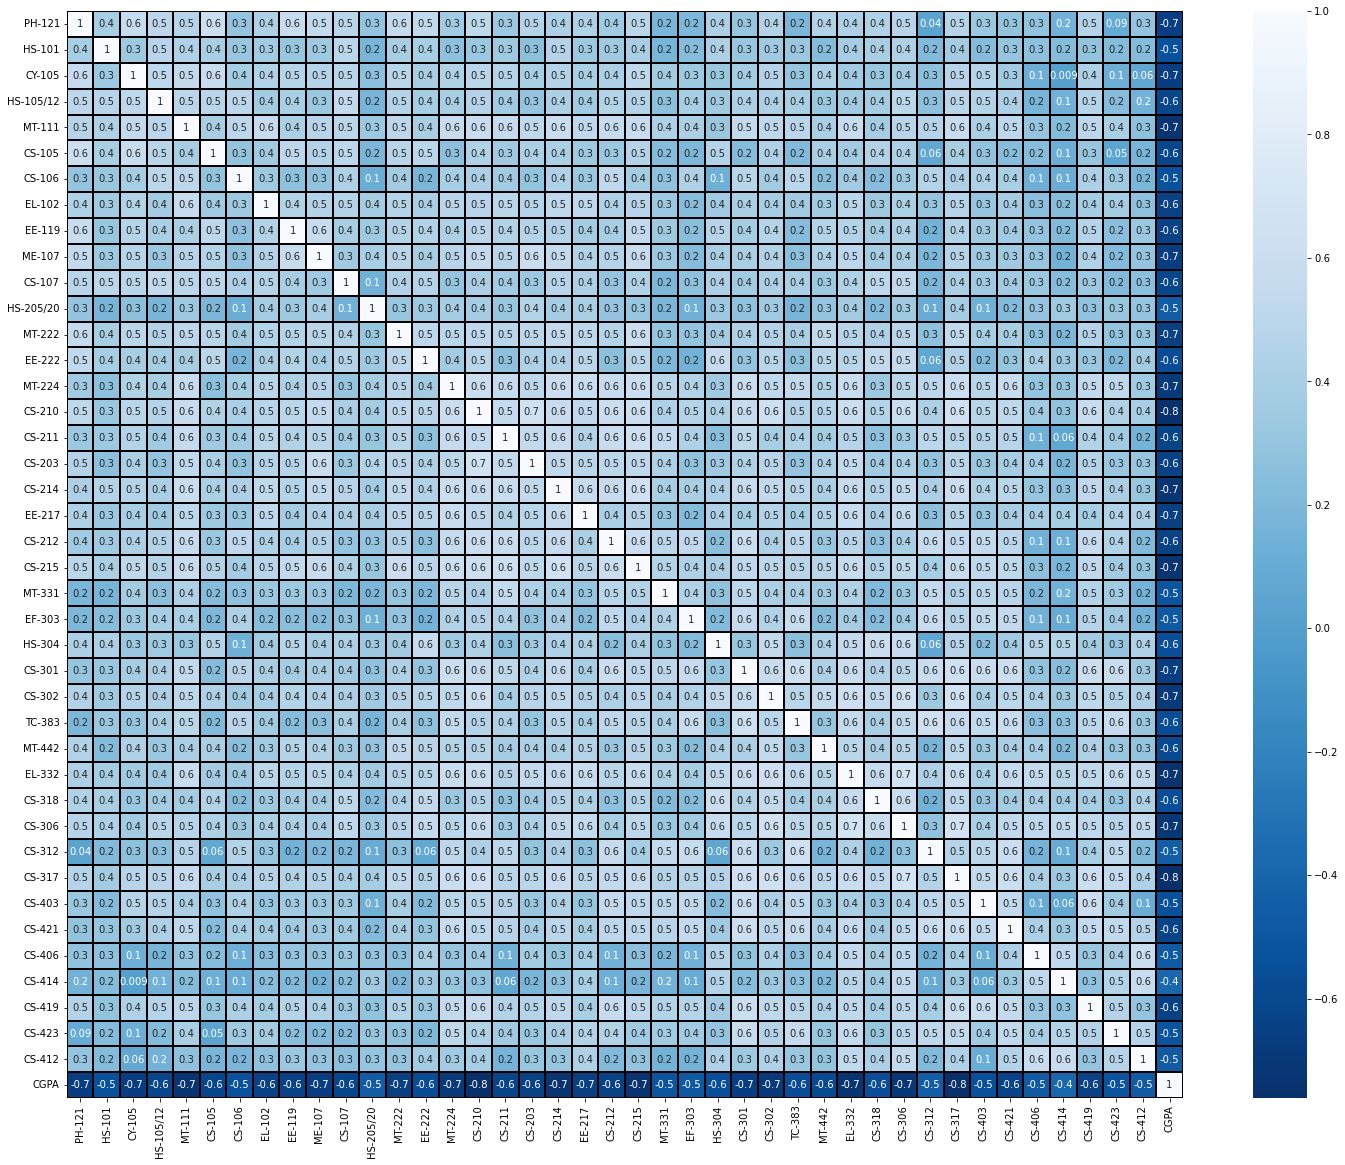

In [55]:
#visualizng the correlation matrix by plotting heatmap
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), linewidths=0.1, fmt='.1g', linecolor='black', annot=True, cmap='Blues_r')
plt.show()

In [56]:
cor['CGPA'].sort_values(ascending=False)

CGPA         1.000000
CS-414      -0.384003
CS-312      -0.458019
HS-205/20   -0.460525
CS-412      -0.466512
CS-406      -0.474419
EF-303      -0.485478
MT-331      -0.508428
CS-423      -0.520968
CS-106      -0.534995
HS-101      -0.537170
CS-403      -0.544543
HS-304      -0.557912
CS-318      -0.566393
TC-383      -0.572329
EE-222      -0.575335
MT-442      -0.582592
CS-105      -0.613169
HS-105/12   -0.613989
CS-107      -0.615309
CS-211      -0.628070
CS-421      -0.633001
CS-419      -0.641804
EL-102      -0.642262
CS-212      -0.642878
CS-203      -0.644191
EE-119      -0.646829
EE-217      -0.655993
MT-222      -0.656320
CY-105      -0.658282
ME-107      -0.663023
PH-121      -0.663135
CS-301      -0.664117
MT-224      -0.692696
CS-302      -0.696112
CS-306      -0.708299
EL-332      -0.729609
MT-111      -0.730095
CS-215      -0.730460
CS-214      -0.733848
CS-317      -0.760792
CS-210      -0.761468
Name: CGPA, dtype: float64

We can observe the positive and negative correlated features with the target

# Visualizing the correlation between label and features using bar plot

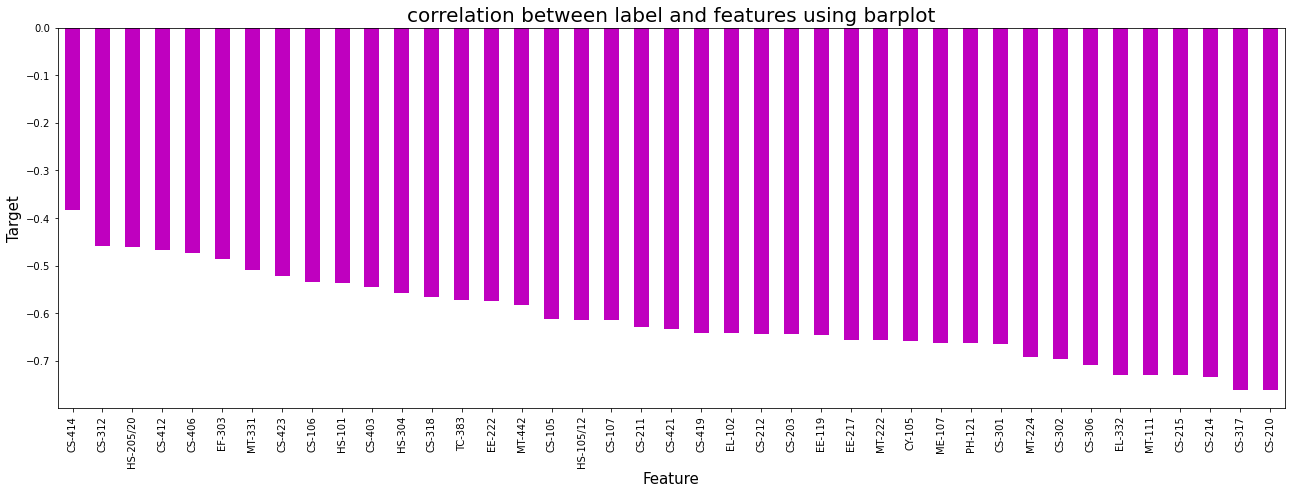

In [57]:
plt.figure(figsize=(22,7))
df.corr()['CGPA'].sort_values(ascending=False).drop(['CGPA']).plot(kind='bar',color='m')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title("correlation between label and features using barplot",fontsize=20)
plt.show()

# Seprating features and label

In [58]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [59]:
x

PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  \
0         5      10       8          6       8      10       9       8   
1         0       9      10          9       5       6       9       0   
2         0       3       0          5       4       0       5       4   
3         9       7      10          9       9       2      10       8   
4         2       2       2          4       0       0       2       4   
..      ...     ...     ...        ...     ...     ...     ...     ...   
566       3       0       0          2       1       0       2       2   
567       1       0       0          0       0       0       0       2   
568       3       0       2          4       0       0       0       0   
569       0       4       9          0       9      10       5       8   
570       6       9       9          6       6      10       3       7   

     EE-119  ME-107  ...  CS-306  CS-312  CS-317  CS-403  CS-421  CS-406  \
0         5       8  ...       6       8       8       8       8       2   
1        10       9  ...       9      10       9       6       9       2   
2         2       2  ...       2       3       3       0       6       0   
3         9       7  ...       8      10       6      10       8       5   
4         0       2  ...       2       5       4       4       5       2   
..      ...     ...  ...     ...     ...     ...     ...     ...     ...   
566       1       4  ...       4       2       2       0       0       0   
567       0       0  ...       2       4       4       0       0       2   
568       0       3  ...       4       2       3       0       4       0   
569       5       8  ...       4       9       3       3       8       9   
570       6      10  ...      10       7       6       5       9      11   

     CS-414  CS-419  CS-423  CS-412  
0         0       8       3       2  
1         5       6       6       3  
2         0       0       2       0  
3         3       7       7       7  
4         0       2       2       0  
..      ...     ...     ...     ...  
566       4       4       3       0  
567       3       2       6       2  
568       6       4       2       2  
569       6       3       5       6  
570       8       4       9       8  

[571 rows x 41 columns]

In [60]:
y

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 571, dtype: float64

In [61]:
x.shape

(571, 41)

In [62]:
y.shape

(571,)

# Feature Scalling Using Standard Scalarization

In [63]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

PH-121    HS-101    CY-105  HS-105/12    MT-111    CS-105    CS-106  \
0    0.400402  1.770900  1.722261   0.549869  1.374222  2.657832  1.790004   
1   -1.242052  1.411559  2.397448   1.488043  0.369509  1.173242  1.790004   
2   -1.242052 -0.744483 -0.978490   0.237145  0.034605 -1.053643  0.322008   
3    1.714365  0.692879  2.397448   1.488043  1.709126 -0.311348  2.157003   
4   -0.585070 -1.103823 -0.303302  -0.075580 -1.305012 -1.053643 -0.778989   
..        ...       ...       ...        ...       ...       ...       ...   
566 -0.256579 -1.822504 -0.978490  -0.701029 -0.970108 -1.053643 -0.778989   
567 -0.913561 -1.822504 -0.978490  -1.326478 -1.305012 -1.053643 -1.512987   
568 -0.256579 -1.822504 -0.303302  -0.075580 -1.305012 -1.053643 -1.512987   
569 -1.242052 -0.385142  2.059854  -1.326478  1.709126  2.657832  0.322008   
570  0.728893  1.411559  2.059854   0.549869  0.704413  2.657832 -0.411990   

       EL-102    EE-119    ME-107  ...    CS-306    CS-312    CS-317  \
0    1.333963  0.419492  1.024565  ...  0.663660  1.169315  1.155824   
1   -1.307365  2.302589  1.342687  ...  1.715324  1.764660  1.521056   
2    0.013299 -0.710366 -0.884168  ... -0.738559 -0.319046 -0.670339   
3    1.333963  1.925970  0.706443  ...  1.364769  1.764660  0.425358   
4    0.013299 -1.463605 -0.884168  ... -0.738559  0.276298 -0.305107   
..        ...       ...       ...  ...       ...       ...       ...   
566 -0.647033 -1.086986 -0.247924  ... -0.037450 -0.616719 -1.035572   
567 -0.647033 -1.463605 -1.520412  ... -0.738559 -0.021374 -0.305107   
568 -1.307365 -1.463605 -0.566046  ... -0.037450 -0.616719 -0.670339   
569  1.333963  0.419492  1.024565  ... -0.037450  1.466987 -0.670339   
570  1.003797  0.796111  1.660810  ...  2.065879  0.871643  0.425358   

       CS-403    CS-421    CS-406    CS-414    CS-419    CS-423    CS-412  
0    1.533685  0.958939 -0.399094 -0.960095  1.740513 -0.346121 -0.450178  
1    0.862110  1.325686 -0.399094  1.042149  0.900418  0.727983 -0.021043  
2   -1.152616  0.225444 -1.210063 -0.960095 -1.619869 -0.704156 -1.308446  
3    2.205260  0.958939  0.817361  0.241251  1.320466  1.086017  1.695494  
4    0.190534 -0.141304 -0.399094 -0.960095 -0.779774 -0.704156 -1.308446  
..        ...       ...       ...       ...       ...       ...       ...  
566 -1.152616 -1.975041 -1.210063  0.641700  0.060322 -0.346121 -1.308446  
567 -1.152616 -1.975041 -0.399094  0.241251 -0.779774  0.727983 -0.450178  
568 -1.152616 -0.508051 -1.210063  1.442597  0.060322 -0.704156 -0.450178  
569 -0.145253  0.958939  2.439300  1.442597 -0.359726  0.369948  1.266360  
570  0.526322  1.325686  3.250269  2.243495  0.060322  1.802087  2.124628  

[571 rows x 41 columns]

We have scaled the data using standard scalarization method to overcome the issue of biasness standard scaler will convert mean=0 and std=1

Now we check for the multicolinearity for this we use Variance Inflation factor(VIF) method

# Checking Variance Inflation factor(VIF)

In [64]:
#Finding varience inflation factor in each scaled column

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i)
            for i in range(len(x.columns))]
vif['Features']=x.columns
vif

VIF Values   Features
0     2.827608     PH-121
1     1.771294     HS-101
2     2.514966     CY-105
3     2.293035  HS-105/12
4     2.638921     MT-111
5     2.366597     CS-105
6     1.927701     CS-106
7     1.968027     EL-102
8     2.190768     EE-119
9     2.294552     ME-107
10    2.350875     CS-107
11    1.633210  HS-205/20
12    2.277248     MT-222
13    2.254361     EE-222
14    2.798314     MT-224
15    3.084264     CS-210
16    2.640904     CS-211
17    2.612616     CS-203
18    2.688396     CS-214
19    2.435192     EE-217
20    2.770283     CS-212
21    3.022915     CS-215
22    2.052599     MT-331
23    2.113301     EF-303
24    2.498852     HS-304
25    3.095874     CS-301
26    2.741509     CS-302
27    2.889101     TC-383
28    2.027056     MT-442
29    3.275353     EL-332
30    2.355677     CS-318
31    3.471549     CS-306
32    3.239651     CS-312
33    3.161398     CS-317
34    2.504472     CS-403
35    2.813594     CS-421
36    2.166488     CS-406
37    2.294821     CS-414
38    2.553670     CS-419
39    2.559626     CS-423
40    2.372103     CS-412

Here we can see that there is no multicolinearity present in the dataset so no need to remove the multicolinearity

# Finding the best random state

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20)

In [66]:
x_train.shape

(456, 41)

In [67]:
y_train.shape

(456,)

In [68]:
x_test.shape

(115, 41)

In [69]:
y_test

448    3.523
121    2.028
344    2.384
90     2.084
197    3.425
       ...  
290    3.071
19     3.483
556    3.624
514    3.027
55     3.010
Name: CGPA, Length: 115, dtype: float64

In [70]:
for i in range(100):
    lr = LinearRegression()
    lr.random_state = i
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    print("Random state: {}, MSE: {}".format(i, mse))

Random state: 0, MSE: 0.028919910683329438
Random state: 1, MSE: 0.028919910683329438
Random state: 2, MSE: 0.028919910683329438
Random state: 3, MSE: 0.028919910683329438
Random state: 4, MSE: 0.028919910683329438
Random state: 5, MSE: 0.028919910683329438
Random state: 6, MSE: 0.028919910683329438
Random state: 7, MSE: 0.028919910683329438
Random state: 8, MSE: 0.028919910683329438
Random state: 9, MSE: 0.028919910683329438
Random state: 10, MSE: 0.028919910683329438
Random state: 11, MSE: 0.028919910683329438
Random state: 12, MSE: 0.028919910683329438
Random state: 13, MSE: 0.028919910683329438
Random state: 14, MSE: 0.028919910683329438
Random state: 15, MSE: 0.028919910683329438
Random state: 16, MSE: 0.028919910683329438
Random state: 17, MSE: 0.028919910683329438
Random state: 18, MSE: 0.028919910683329438
Random state: 19, MSE: 0.028919910683329438
Random state: 20, MSE: 0.028919910683329438
Random state: 21, MSE: 0.028919910683329438
Random state: 22, MSE: 0.02891991068332943

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

#split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20, random_state=i)

In [72]:
lr.fit(x_train,y_train)

LinearRegression()

In [73]:
lr.coef_

array([-0.055132  , -0.0450369 , -0.06886096, -0.03704234, -0.02502183,
       -0.05458672, -0.04071424, -0.0300296 , -0.01953871, -0.02954484,
       -0.02323228, -0.01461   ,  0.01392321,  0.01040423, -0.03843754,
       -0.06378762, -0.00852474, -0.0092862 , -0.03781785, -0.03074568,
       -0.00105272, -0.03018924, -0.02421474,  0.00295196,  0.00873011,
       -0.02574824, -0.00934426,  0.00266985, -0.01348782, -0.02598144,
        0.00569199, -0.00916045, -0.00134188, -0.04502798, -0.00896384,
       -0.01124198, -0.03928765, -0.03210329,  0.00833337, -0.03564007,
       -0.0156537 ])

In [74]:
lr.intercept_

2.9649923069993993

In [75]:
lr.score(x_train,y_train)  

0.9437033056531864

In [76]:
pred=lr.predict(x_test)
print("predicted result:",pred)
print("actual ",y_test)

predicted result: [2.34361198 3.84307099 3.75548814 2.74907057 2.72584687 2.14238839
 2.59573998 2.76112688 2.89021995 3.05016204 2.9624632  3.52197106
 1.74343522 3.13366558 2.76884034 2.46438886 3.34921284 2.26417257
 3.70010249 2.96343796 3.77951227 3.69355429 2.95890958 2.58231096
 3.38669454 3.09330864 2.82188054 3.3537876  3.28727625 3.45567514
 2.97196231 3.6911992  2.91943215 3.83621055 3.2331531  1.97498568
 2.97488192 3.80705647 2.55897571 1.78292708 3.40379311 3.68586149
 3.53136397 2.32629413 3.8022283  1.94593568 3.44318851 3.92524318
 2.81523069 3.12454046 3.32616993 2.90835481 2.62231315 3.0778387
 2.69771476 3.5295952  2.09055622 3.73892642 2.24592083 2.42095519
 2.85677796 3.19520022 3.63034143 3.57664558 3.70051833 3.26990037
 2.55720154 3.80952386 3.35694642 3.36496865 2.8827015  3.04981249
 3.1861304  2.03835061 2.68168719 2.54613154 2.73252138 3.64789262
 3.58699295 3.90811411 2.15985847 3.26688918 1.87637687 3.03572282
 3.24022889 3.48879567 2.20554084 2.48971723 

In [77]:
print('error:')

print("mean absolute error:",mean_absolute_error(y_test,pred))
print("mean squared error:",mean_squared_error(y_test,pred))

print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error: 0.11526959657364343
mean squared error: 0.05415410810667177
Root Mean squared error: 0.2327103523839706


In [78]:
from sklearn.metrics import r2_score
print (r2_score(y_test,pred))

0.8720275891126916


it shows how much change is coming in y when the inputs are changed

In [79]:
predict_test=lr.predict(x_test)
predict_test

array([2.34361198, 3.84307099, 3.75548814, 2.74907057, 2.72584687,
       2.14238839, 2.59573998, 2.76112688, 2.89021995, 3.05016204,
       2.9624632 , 3.52197106, 1.74343522, 3.13366558, 2.76884034,
       2.46438886, 3.34921284, 2.26417257, 3.70010249, 2.96343796,
       3.77951227, 3.69355429, 2.95890958, 2.58231096, 3.38669454,
       3.09330864, 2.82188054, 3.3537876 , 3.28727625, 3.45567514,
       2.97196231, 3.6911992 , 2.91943215, 3.83621055, 3.2331531 ,
       1.97498568, 2.97488192, 3.80705647, 2.55897571, 1.78292708,
       3.40379311, 3.68586149, 3.53136397, 2.32629413, 3.8022283 ,
       1.94593568, 3.44318851, 3.92524318, 2.81523069, 3.12454046,
       3.32616993, 2.90835481, 2.62231315, 3.0778387 , 2.69771476,
       3.5295952 , 2.09055622, 3.73892642, 2.24592083, 2.42095519,
       2.85677796, 3.19520022, 3.63034143, 3.57664558, 3.70051833,
       3.26990037, 2.55720154, 3.80952386, 3.35694642, 3.36496865,
       2.8827015 , 3.04981249, 3.1861304 , 2.03835061, 2.68168

# Comparing original values and predicted values 

In [80]:
import numpy as np
a=np.array(y_test)
predict=np.array(lr.predict(x_test))
df_com=pd.DataFrame({'Original':a, 'Predicted':predict_test}, index=range(len(a)))
df_com

Original  Predicted
0       2.193   2.343612
1       3.798   3.843071
2       3.806   3.755488
3       2.845   2.749071
4       2.648   2.725847
..        ...        ...
110     1.493   3.099072
111     3.816   3.934357
112     3.656   3.534751
113     3.335   3.182956
114     3.029   3.038073

[115 rows x 2 columns]

Here we can see the comparegion between predicted cgpa values and original cgpa values 

In [81]:
#predict cgpa by providing random values

t=np.array([5,10,8,6,8,10,9,8,5,8,6,0,4,5,6,2,7,4,3,2,3,4,5,2,1,0,4,3,2,1,3,6,8,8,8,8,2,0,8,3,2])

In [82]:
t.shape 

(41,)

In [83]:
t=t.reshape(1,-1) 
t.shape

(1, 41)

In [84]:
lr.predict(t)

array([-1.91588814])